# COVIS-19 DATA ANALYSIS 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
#style.use('ggplot')
%matplotlib inline

import plotly
import plotly.express as px
import plotly.graph_objects as go
#plt.rcParams['figure.figsize']=17,8
import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot

import folium


# AN OVERVIEW ON THE SPREAD OF COVID-19 

In [2]:
df=pd.read_csv(r"C:\Users\sarna\Desktop\COVID clean.csv")

In [3]:
df.drop(['S. No.'],axis=1,inplace=True)


In [4]:
total_india_cases=df['Total Confirmed cases (Including 111 foreign Nationals)'].sum()
print("The total number of cases in india are",total_india_cases)

The total number of cases in india are 59662


In [5]:
df.rename(columns={'Total Confirmed cases (Including 111 foreign Nationals)':'Total Confirmed Cases','total deaths':'deaths'},inplace=True)

In [6]:
df.style.background_gradient(cmap='Reds')

,Name of State / UT,Total Confirmed Cases,Cured,deaths,Active cases
0,Andaman and Nicobar Islands,33,33,0,0
1,Andhra Pradesh,1887,842,41,1004
2,Arunachal Pradesh,1,1,0,0
3,Assam,59,34,1,24
4,Bihar,571,297,5,269
5,Chandigarh,150,21,1,128
6,Chhattisgarh,59,38,0,21
7,Dadra And Nagar Haveli,1,0,0,1
8,Delhi,6318,2020,68,4230
9,Goa,7,7,0,0


In [7]:
Total_active_cases=df.groupby('Name of State / UT')['Active cases'].sum().sort_values(ascending=False)

In [8]:
Total_active_cases.to_frame().style.background_gradient(cmap='Reds')

,Active cases
Name of State / UT,
Maharashtra,14862
Gujarat,5081
Tamil Nadu,4364
Delhi,4230
Madhya Pradesh,1792
Uttar Pradesh,1761
Rajasthan,1562
Punjab,1550
West Bengal,1154


In [9]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
import folium

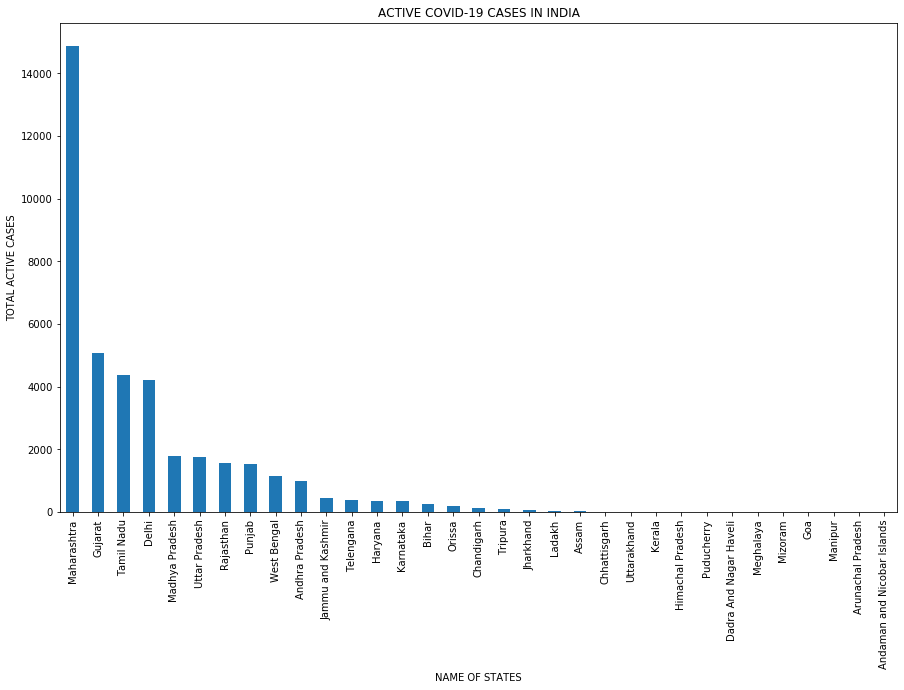

In [10]:
##matplotlib representation
Total_active_cases.plot(kind='bar', figsize=(15, 9))

plt.xlabel('NAME OF STATES') # add to x-label to the plot
plt.ylabel('TOTAL ACTIVE CASES') # add y-label to the plot
plt.title('ACTIVE COVID-19 CASES IN INDIA') # add title to the plot

plt.show()

##plotly representation

pyo.init_notebook_mode(connected=True)
cf.go_offline()

df.iplot(kind='bar',x='Name of State / UT',y='Total Confirmed Cases',xTitle='NAME OF STATES',yTitle='TOTAL ACTIVE CASES',title="ACTIVE COVID-19 CASES IN INDIA")





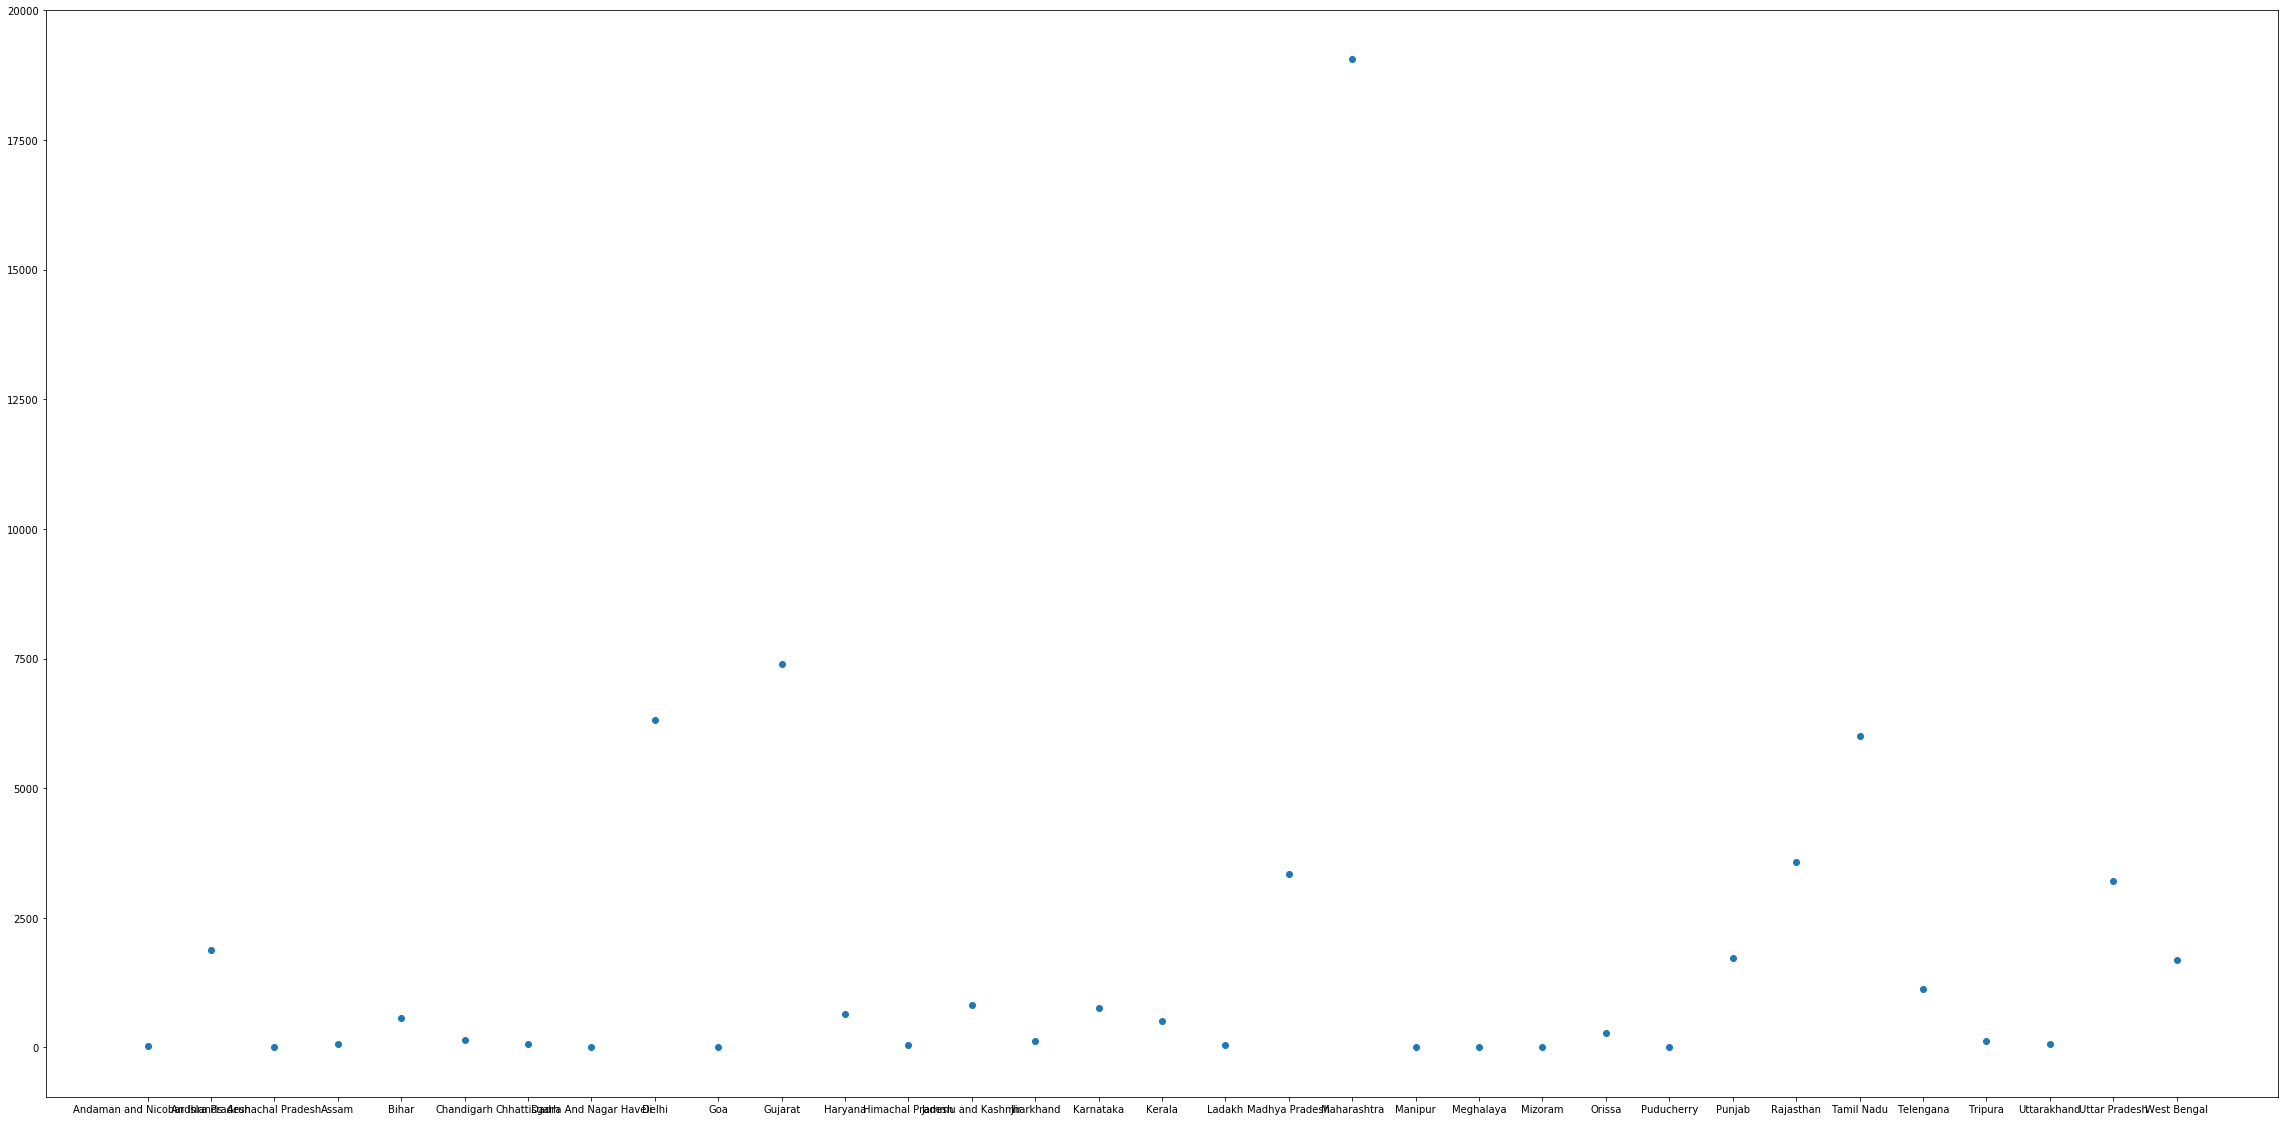

In [11]:
###matplotlib scatter
plt.figure(figsize=(40, 20))
plt.scatter(df['Name of State / UT'],df['Total Confirmed Cases'])
plt.show()

###plotly scatter
df.iplot(kind='scatter',x='Name of State / UT',y='Total Confirmed Cases',xTitle="STATES IN INDIA",yTitle="TOTAL CONFIRMED CASES",mode='markers+lines',colors='RED',size=20)
##plotly express scatter
px.scatter(df,x='Name of State / UT',y='Total Confirmed Cases')

In [12]:
indian_cood=pd.read_excel(r"C:\Users\sarna\Desktop\Indian Coordinates.xlsx ")

In [13]:

df_full=pd.merge(indian_cood,df,on='Name of State / UT')

# GEOSPATIAL REPRESENTATION 

In [14]:
map=folium.Map(location=[22,80],zoom_start=4,tiles='Stamen Terrain')

for lat,long,value, name in zip(df_full['Latitude'],df_full['Longitude'],df_full['Total Confirmed Cases'],df_full['Name of State / UT']):
    folium.CircleMarker([lat,long],radius=5,popup=('<strong>State</strong>: '+str(name).capitalize()+'<br>''<strong>Total Cases</strong>: ' + str(value)+ '<br>'),color='red',fill_color='red',fill_opacity=0.3).add_to(map)
    

In [15]:
map

In [39]:
##for better understanding of state and union terretorial boundaries Stamen Toner named Map tile is used
map=folium.Map(location=[22,80],zoom_start=4,tiles='Stamen Toner')


for lat,long,value, name in zip(df_full['Latitude'],df_full['Longitude'],df_full['Total Confirmed Cases'],df_full['Name of State / UT']):
    folium.CircleMarker([lat,long],radius=5,popup=('<strong>State</strong>: '+str(name).capitalize()+'<br>''<strong>Total Cases</strong>: ' + str(value)+ '<br>'),color='red',fill_color='red',fill_opacity=0.3).add_to(map)
    

In [40]:
map

In [18]:
dbd_India=pd.read_excel(r"C:\Users\sarna\Desktop\per_day_cases.xlsx",parse_dates=True,sheet_name="India")
dbd_Italy=pd.read_excel(r"C:\Users\sarna\Desktop\per_day_cases.xlsx",parse_dates=True,sheet_name="Italy")
dbd_Korea=pd.read_excel(r"C:\Users\sarna\Desktop\per_day_cases.xlsx",parse_dates=True,sheet_name="Korea")
dbd_China=pd.read_excel(r"C:\Users\sarna\Desktop\per_day_cases.xlsx",parse_dates=True,sheet_name="China")
dbd_UK=pd.read_excel(r"C:\Users\sarna\Desktop\per_day_cases.xlsx",parse_dates=True,sheet_name="UK")
dbd_USA=pd.read_excel(r"C:\Users\sarna\Desktop\per_day_cases.xlsx",parse_dates=True,sheet_name="USA")
dbd_Spain=pd.read_excel(r"C:\Users\sarna\Desktop\per_day_cases.xlsx",parse_dates=True,sheet_name="Spain")
dbd_Russia=pd.read_excel(r"C:\Users\sarna\Desktop\per_day_cases.xlsx",parse_dates=True,sheet_name="Russia")
dbd_France=pd.read_excel(r"C:\Users\sarna\Desktop\per_day_cases.xlsx",parse_dates=True,sheet_name="France")

In [19]:
dbd_India.iplot(kind='scatter',x='Date',y='Total Cases',xTitle="TIMELINE",yTitle="TOTAL CONFIRMED CASES",mode='markers+lines',colors='BLUE',size=5)

##plotly express gives a better representation of threshold values
fig=px.scatter(dbd_India,x='Date',y='Total Cases',color='Total Cases',title="TOTAL CONFIRMED CASES")
fig.show()

In [20]:

dbd_India.iplot(kind='bar',x='Date',y='New Cases',xTitle='TIMELINE',yTitle='NEW CONFIRMED CASES',colors="BLUE")
##plotly express it is used to describe the graph in a better way..color contrast is the key of data viz.
fig=px.bar(dbd_India,x='Date',y='New Cases',color='New Cases',title="Confirmed Cases In India")
fig.show()

# INDIA COVID-19 STATS

In [21]:
df=pd.read_excel(r"C:\Users\sarna\Desktop\INDIA CASES.xlsx",parse_dates=['Last update'])

In [22]:
Cured=df.groupby('Date').sum()['Cured'].reset_index()
Confirmed=df.groupby('Date').sum()['New Cases'].reset_index()
Deaths=df.groupby('Date').sum()['Deaths'].reset_index()


In [23]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=Confirmed['Date'],y=Confirmed['New Cases'],mode='lines+markers',name='Confirmed',line=dict(color='blue',width=2)))

fig.add_trace(go.Scatter(x=Deaths['Date'],y=Deaths['Deaths'],mode='lines+markers',name='Deaths',line=dict(color='red',width=2)))
fig.add_trace(go.Scatter(x=Cured['Date'],y=Cured['Cured'],mode='lines+markers',name='Recovered',line=dict(color='green',width=2)))


# COVID-19 SPREAD ACROSS COUNTRIES

In [24]:
from plotly.subplots import make_subplots

In [25]:
fig=make_subplots(
    rows=2,cols=2,
    specs=[[{"secondary_y":True},{"secondary_y":True}],[{"secondary_y":True},{"secondary_y":True}]],
    subplot_titles=("USA","Spain","Russia","UK","Italy","France"))

fig.add_trace(go.Scatter(x=dbd_USA['Date'],y=dbd_USA['Total Cases'],
                    marker=dict(color=dbd_USA['Total Cases'],coloraxis="coloraxis")),1,1)

fig.add_trace(go.Scatter(x=dbd_Spain['Date'],y=dbd_Spain['Total Cases'],
                    marker=dict(color=dbd_Spain['Total Cases'],coloraxis="coloraxis")),1,2)

fig.add_trace(go.Scatter(x=dbd_Russia['Date'],y=dbd_Russia['Total Cases'],
                    marker=dict(color=dbd_Russia['Total Cases'],coloraxis="coloraxis")),2,1)

fig.add_trace(go.Scatter(x=dbd_UK['Date'],y=dbd_UK['Total Cases'],
                    marker=dict(color=dbd_UK['Total Cases'],coloraxis="coloraxis")),2,2)




fig.update_layout(coloraxis=dict(colorscale='Bluered_r'),showlegend=False,title_text="Total Cases in 4 Countries")

fig.update_layout(plot_bgcolor='rgb(230,230,230)')

In [26]:


fig=go.Figure()
fig.add_trace(go.Scatter(x=dbd_India['Date'],y=dbd_India['Total Cases'],mode='lines+markers',name='India',line=dict(color='blue',width=1)))

fig.add_trace(go.Scatter(x=dbd_USA['Date'],y=dbd_USA['Total Cases'],mode='lines+markers',name='USA',line=dict(color='red',width=2)))
fig.add_trace(go.Scatter(x=dbd_Spain['Date'],y=dbd_Spain['Total Cases'],mode='lines+markers',name='spain',line=dict(color='green',width=2)))
fig.add_trace(go.Scatter(x=dbd_Russia['Date'],y=dbd_Russia['Total Cases'],mode='lines+markers',name='Russia',line=dict(color='yellow',width=2)))
fig.add_trace(go.Scatter(x=dbd_France['Date'],y=dbd_France['Total Cases'],mode='lines+markers',name='France',line=dict(color='cyan',width=2)))
fig.add_trace(go.Scatter(x=dbd_UK['Date'],y=dbd_UK['Total Cases'],mode='lines+markers',name='UK',line=dict(color='black',width=2)))
fig.add_trace(go.Scatter(x=dbd_Italy['Date'],y=dbd_Italy['Total Cases'],mode='lines+markers',name='Italy',line=dict(color='grey',width=2)))
fig.update_layout(title_text="COMPARISON OF TOTAL CONFIRMED CORONA CASES ACROSS COUNTRIES")

# WORLD COVID-19 SPREAD 
# TIME SERIES FORCASTING


In [27]:
df_world=pd.read_csv(r"C:\Users\sarna\Desktop\world.csv")

In [28]:
fig=px.density_mapbox(df_world,lat="Lat",lon="Long",hover_name="Country",hover_data=["Total confirmed cases of COVID-19 (cases)"],animation_frame="Date",color_continuous_scale="portland",radius=7
                      ,zoom=0,height=700)
fig.update_layout(title='Worldwide Corona Virus Cases')
fig.update_layout(mapbox_style="open-street-map",mapbox_center_lon=0)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()